In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW, Adam
from GAN.models import Generator, Discriminator, DCGenerator, DCDiscriminator

/home/noga.kertes/.conda/envs/Noga_ECG/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda'
signal_length = 7500
# gen_weights_path = "/tcmldrive/NogaK/ECG_classification/experiments/tcml_GAN_basic_attempt_3000_epochs_20230603_16_20_11/models/epoch_2999_generator_model.pth"
gen_weights_path = "/tcmldrive/NogaK/ECG_classification/experiments/tcml_DCGAN_new_archs_noise_size_100_declr_1e-5_genlr_1e-5_dec_opt_SGD_20230621_14_36_53/models/epoch_499_generator_model.pth"
batch_size = 1
gen = DCGenerator(nz=100)
gen.load_state_dict(torch.load(gen_weights_path))

<All keys matched successfully>

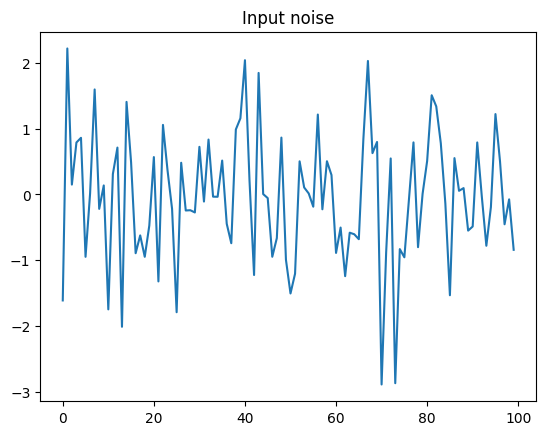

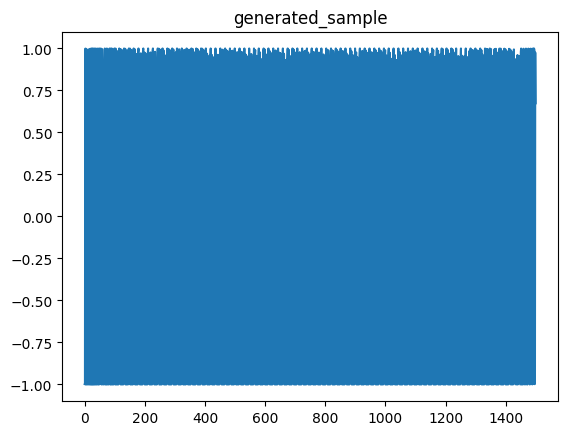

In [5]:
gen.to(device)
fixed_noise = torch.randn(batch_size, 1, 100, device=device)
fake = gen(fixed_noise)

plt.figure()
plt.plot(fixed_noise.detach().cpu().squeeze(1).numpy()[:].transpose())
plt.title(f'Input noise')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()

plt.figure()
plt.plot(fake.detach().cpu().squeeze(1).numpy()[:].transpose())
plt.title(f'generated_sample')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()

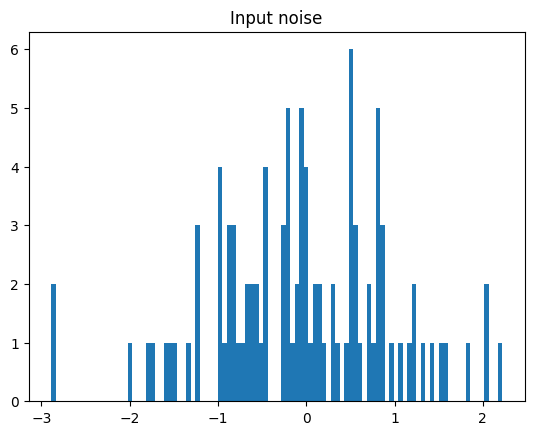

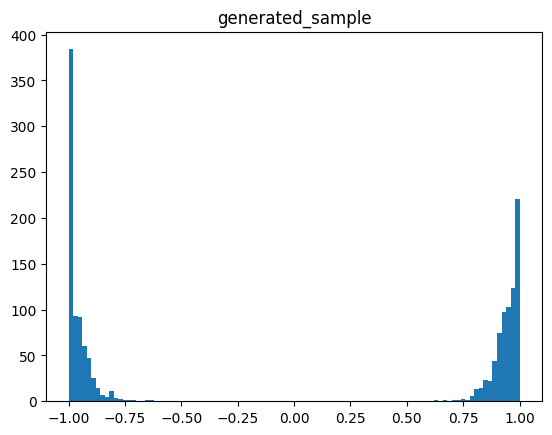

In [7]:
plt.figure()
plt.hist(fixed_noise.detach().cpu().squeeze(1).numpy()[:].transpose(),bins=100)
plt.title(f'Input noise')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()

plt.figure()
plt.hist(fake.detach().cpu().squeeze(1).numpy()[:].transpose(), bins=100)
plt.title(f'generated_sample')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()